![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


- Nombre de alumno 1: Sebastián Versluys
- Nombre de alumno 2: Josué Guillen

### **Link de repositorio de GitHub:** `https://github.com/Nietsabas/MDS7202`

## 1. Introducción

### Descripción del problema

El problema planteado implica desarrollar un modelo predictivo de riesgo crediticio para el banco de Giturra. El objetivo es predecir la probabilidad de que los clientes que soliciten préstamos no cumplan con los pagos acordados. Para lograr esto, se utilizará una amplia variedad de variables relacionadas con los usuarios, como historiales de crédito, ingresos y otros factores financieros relevantes.

El propósito del modelo es proporcionar al banco una herramienta que les permita evaluar el nivel de riesgo asociado con cada cliente y cada préstamo específico. Al tener una estimación de la probabilidad de incumplimiento de cada cliente, el banco podrá tomar decisiones más informadas sobre si aprobar o rechazar un préstamo y también ajustar las condiciones del préstamo para mitigar los riesgos potenciales.

Es importante que el modelo sea interpretable, lo que significa que debe ser fácilmente comprensible y explicativo para el equipo de Giturra. Esto permitirá que se pueda identificar las variables más influyentes en la predicción de riesgo y que el equipo del banco Giturra puede entender cómo se toman las decisiones crediticias basadas en estas variables.

### Descripción variables dadas en contexto

Los datos de entrada proporcionados para el problema de riesgo crediticio incluyen información sobre los clientes que solicitan préstamos al banco. Estos datos abarcan variables como historial crediticio e ingresos

- Historial crediticio: Esta variable proporciona información sobre el comportamiento crediticio pasado de los clientes, incluyendo si han realizado pagos a tiempo, si tienen deudas pendientes, si han tenido historial de crédito negativo, etc. Un buen historial crediticio suele ser indicativo de un menor riesgo de incumplimiento.

- Ingresos: Estas variables incluyen datos relacionados con los ingresos mensuales de los clientes, sus activos financieros. A priori se podría pensar que un mayor ingreso o mejor situación financiera suelen implicar una mayor capacidad para cumplir con los pagos del préstamo.

También según el contexto del problema que tiene banco Giturra existen otras variables relevantes, estas podrían ser a priori (sin haber visto el dataset): información personal del cliente (edad, estado civil, número de dependientes, antigüedad laboral), características del préstamo (monto, plazo, tasa de interés, tipo de préstamo), variables socioeconómicas (nivel educativo, ubicación geográfica, sector laboral). Estos datos en conjunto con los ya brindados (ingresos, historial crediticio) pueden ser fundamentales para evaluar la estabilidad financiera y capacidad de pago del cliente, así como para estimar el riesgo asociado al préstamo y tomar decisiones informadas en el proceso de concesión de préstamos, sin embargo en las siguientes secciones se verá si contamos con este tipo de datos.

### Métrica relevante

Para evaluar los modelos generados en el problema de riesgo crediticio, se utilizará el F1-score, enfocándose específicamente en la clase de préstamos impagados debido al desbalanceo de clases en los datos. El F1-score es una métrica que combina precisión y recall, lo que lo hace adecuado para abordar el desafío de clasificar correctamente los préstamos impagados, evitando tanto falsos positivos como falsos negativos y permitiendo tomar decisiones más informadas para reducir el riesgo crediticio.

## 2. Carga de datos y Análisis Exploratorio de Datos

### Carga de dataset

In [2]:
import pandas as pd
df = pd.read_parquet("dataset.pq")
df.head(5)

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [3]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [4]:
df.shape

(12500, 22)

## 3. Preparación de datos

Antes de empezar el column transformer es prudente y necesario tratar errores de imputación u outliers relevantes a eliminar, para ello lo primero que se hará será filtrar las muestras para edades en torno a los 14 y 100 años, este rango se define viendo el EDA que sale en el profile, pues se puede notar que los 5 valores mínimos con menor aparición en este variable es -500 con un 0.8% por lo que esto claramente es un error de imputación así que debe ir fuera de este filtro, por otro lado el segundo valor mínimo es 14 que en general es la edad mínima para que un adolescente puede entrar al sistema financiero en muchos paises por lo que tiene sentido para usarlo como cota mínima, por otro lado como cota máxima se usa 100 años que es una edad prudente ya que clientes mayores a esa edad o están muertos o no tienen mucho valor para el banco.

In [5]:
#Filtrando muestras con edades en torno a 14 y 100 años

df = df[(df['age'] >= 14) & (df['age'] <= 100)]

También se encontraron cantidades extremadamente altas que no corresponden a la naturaleza de la variable por ejemplo un valor extremadamente alto de `interest_rate`, en el dataset df esta variable no esta en porcentaje si no en un número que apriori deberia ser mayor a 0 y menor a 100, es imposible que se cobren tasas de interés superiores inclusivo a cotas como 30 o 50, esto ya que el sistema bancario siempre ha estado regulado, por lo que va1ores superiores a este se consideran outliers o mala inputación de valores, sin embargo para ser más objetivos se eliminaran valores superiores a 100, que sería tasas mayores a 100%.

In [6]:
df = df[df['interest_rate'] <= 100]

Del EDA del profile se puede notar que existen valores negativos en cantidades, como valor negativo en cuentas de banco (`num_bank_accounts`), número de préstamos (`num_of_loan`), `delay_from_due_date` que apriori no puede ser negativo ya que es el promedio de días de retraso desde la fecha de pago, de la misma manera para `num_of_delayed_payment` no puede haber un promedio negativo de pagos atrasados ​​por una persona, a priori se podría pensar que el `changed_credit_limit` no podría ser negativo pero esta variable que representa el cambio porcentual en el límite de la tarjeta de crédito podría ser negativo si se disminuye el límite a los créditos de una persona (que por experiencia podría pasar cuando se tiene un comportamiento crediticio malo),

In [7]:
df = df[df['num_of_loan'] >= 0]
df = df[df['num_bank_accounts'] >= 0]
df = df[df['delay_from_due_date'] >= 0]
df = df[df['num_of_delayed_payment'] >= 0]


Finalmente, se eliminan variables que no tienen mayor explicabilidad como customer_id notando segun el profile que no existen duplicados en esta variable

In [8]:
df = df.drop(columns=['customer_id'])

In [9]:
df.shape

(10528, 21)

Notemos que estos filtros son necesarios antes de empezar, además pasamos de 12k a 10.5k es decir una reducción de 12% lo cual no es mucho dada la cantidad de datos que teníamos previamente.

### Preprocesamiento con `ColumnTransformer`

Es necesario también convertir las columnas mal leidas a sus tipos correspondientes

In [10]:
df.dtypes

age                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                 float64
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [11]:
df['age'] = df['age'].astype('int64')
df['num_of_loan'] = df['num_of_loan'].astype('int64')
df['delay_from_due_date'] = df['delay_from_due_date'].astype('float64')

Se cambiaron los tipos de las variables por las siguientes razones:

- `age`: Se cambió a tipo `int` porque la edad de una persona generalmente se representa como un número entero, y no tiene sentido tener valores decimales para la edad.
- `num_of_loan`: Se cambió a tipo `int` porque la cantidad de préstamos tomados por una persona debe ser un número entero. Los préstamos no se pueden tomar en fracciones.

- `delay_from_due_date`: Se cambió a tipo `float` porque la variable representa la cantidad promedio de días de retraso en los pagos, y este valor podría tener decimales si hay retrasos parciales en los pagos.

Estos cambios en el tipo de dato garantizan que las variables estén representadas de la manera más adecuada para su posterior análisis y modelado, ya que se alinean mejor con la naturaleza de los datos y sus significados en el contexto del riesgo crediticio.

In [12]:
df.dtypes

age                           int64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
delay_from_due_date         float64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [13]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Variables numéricas
numeric_features = ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
                    'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date',
                    'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries',
                    'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age',
                    'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

# Variables categóricas
categorical_features = ['occupation', 'payment_of_min_amount', 'payment_behaviour']

# Preprocesamiento de variables numéricas
numeric_transformer = StandardScaler()

# Preprocesamiento de variables categóricas con OneHotEncoder (sin datos dispersos)
categorical_transformer = OneHotEncoder(sparse=False)

# Dividir el DataFrame en características (X) y variable objetivo (y)
X = df.drop(columns=['credit_score'])
y = df['credit_score']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Configuramos la salida del preprocesador como un DataFrame de pandas
preprocessor.set_output(transform="pandas")

X_preprocessed = preprocessor.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Estableciendo semilla aleatoria

semilla = 42

In [15]:
type(X_preprocessed)

pandas.core.frame.DataFrame

In [16]:
print(df.columns)


Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')


### Holdout

In [17]:
# Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)


###  Datos nulos

In [18]:
### NaNs

porcentajes_nulos = (df.isnull().sum() / len(df))
porcentajes_nulos = porcentajes_nulos.sort_values(ascending=False)
porcentajes_nulos

monthly_inhand_salary       0.152451
credit_history_age          0.088526
amount_invested_monthly     0.046922
monthly_balance             0.028210
num_credit_inquiries        0.020802
changed_credit_limit        0.020327
payment_behaviour           0.000000
total_emi_per_month         0.000000
payment_of_min_amount       0.000000
credit_utilization_ratio    0.000000
outstanding_debt            0.000000
age                         0.000000
occupation                  0.000000
num_of_delayed_payment      0.000000
delay_from_due_date         0.000000
num_of_loan                 0.000000
interest_rate               0.000000
num_credit_card             0.000000
num_bank_accounts           0.000000
annual_income               0.000000
credit_score                0.000000
dtype: float64

Como podemos ver en el profile dado y el código anterior la variable `monthly_inhand_salary` cuenta con un mayor número de NANs, a priori como se comentó en la sección 1 se cree que el salario puede estar involucrado en el riesgo crediticio, por lo que eliminar muestras con NaNs en esta variable puede resultar en un sesgo considerable dado que estos NaNs representan un alto porcentaje (15%) por ende se decide usar otro técnica que no sea el drop de NaNs que es la imputación de la mediana. Lo mismo sucede con `credit_history_age` que a priori puede llegar a tener un fuerte sesgo el eliminar muestras con NaNs en esta variable, por ende se decide realizar una imputación sobre la mediana también. Siguiendo esa linea y dado que el modelo tiene pocas NaNs para las otras variables se decide hacer imputación de mediana finalmente para todas.


## Baseline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

# Clasificadores a evaluar
classifiers = {
    'Dummy (Stratified)': DummyClassifier(strategy='stratified', random_state=semilla),
    'Logistic Regression': LogisticRegression(random_state=semilla),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=semilla),
    'SVM': SVC(random_state=semilla),
    'Random Forest': RandomForestClassifier(random_state=semilla),
    'LightGBM': LGBMClassifier(random_state=semilla),
    'XGBoost': XGBClassifier(random_state=semilla)
}

# Creamos un arreglo para almacenar las métricas
metrics = []

# Pipeline para el imputador promedio (mean imputer)
mean_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])


for clf_name, clf in classifiers.items():
    # Creamos el pipeline con el preprocesamiento, imputador promedio y el clasificador
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('imputer', mean_imputer),
        ('classifier', clf)
    ])
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)

    # Evaluamos el modelo en el conjunto de prueba
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Imprimimos todas las métricas del classification_report
    print(f"Classification Report - {clf_name}:")
    print(classification_report(y_test, y_pred))
    print()

    # Almacenamos el f1_score en el DataFrame de métricas
    metrics.append({'Classifier': clf_name, 'F1 Score': report['1']['f1-score']})

# Creamos un DataFrame con los resultados
results_df = pd.DataFrame(metrics)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
print("F1 Score para cada Clasificador:")
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - Dummy (Stratified):
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1488
           1       0.32      0.31      0.32       618

    accuracy                           0.60      2106
   macro avg       0.52      0.52      0.52      2106
weighted avg       0.60      0.60      0.60      2106


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1488
           1       0.66      0.40      0.50       618

    accuracy                           0.76      2106
   macro avg       0.72      0.66      0.67      2106
weighted avg       0.75      0.76      0.74      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1488
           1       0.60      0.46      0.52       618

    accuracy                           0.75      2106
   macro avg       0.70      0.67      0.68      2106
weighted avg       0.74      0.75      0.74      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1488
           1       0.47      0.49      0.48       618

    accuracy                           0.69      2106
   macro avg       0.63      0.63      0.63      2106
weighted avg       0.69      0.69      0.69      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1488
           1       0.65      0.45      0.53       618

    accuracy                           0.77      2106
   macro avg       0.72      0.67      0.69      2106
weighted avg       0.75      0.77      0.75      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1488
           1       0.69      0.52      0.59       618

    accuracy                           0.79      2106
   macro avg       0.75      0.71      0.73      2106
weighted avg       0.78      0.79      0.78      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1488
           1       0.67      0.55      0.61       618

    accuracy                           0.79      2106
   macro avg       0.75      0.72      0.73      2106
weighted avg       0.78      0.79      0.78      2106




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1488
           1       0.64      0.53      0.58       618

    accuracy                           0.78      2106
   macro avg       0.73      0.70      0.71      2106
weighted avg       0.77      0.78      0.77      2106


F1 Score para cada Clasificador:
            Classifier  F1 Score
6             LightGBM  0.606383
5        Random Forest  0.593205
7              XGBoost  0.581045
4                  SVM  0.532443
2  K-Nearest Neighbors  0.521898
1  Logistic Regression  0.498994
3        Decision Tree  0.482157
0   Dummy (Stratified)  0.315617


¿Hay algún clasificador entrenado mejor que el azar (Dummy)?
Sí, todos los clasificadores entrenados tienen un F1 Score mayor que el clasificador Dummy, que tiene un F1 Score de aproximadamente 0.290. Esto indica que todos los clasificadores están aprendiendo patrones relevantes en los datos y superan significativamente el rendimiento aleatorio del Dummy.

¿Cuál es el mejor clasificador entrenado?
El mejor clasificador entrenado es LightGBM, con un F1 Score de aproximadamente 0.606. Esto indica que LightGBM tiene un mejor equilibrio entre precisión y recall, lo que sugiere que puede identificar correctamente a los individuos que tienen un alto riesgo crediticio (clase 1) y también aquellos que no (clase 0).

¿Por qué el mejor clasificador es mejor que los otros?
LightGBM es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza el enfoque de "gradient boosting". Este método suele ofrecer un rendimiento sólido en muchos conjuntos de datos debido a su eficiencia y capacidad para manejar grandes cantidades de datos y características. También puede manejar datos categóricos sin necesidad de codificación previa. Además, al utilizar "gradient boosting", se combinan varios árboles débiles para formar un modelo más robusto y generalizable.

El buen rendimiento de LightGBM también puede atribuirse a su capacidad para tratar datos desbalanceados, como en este caso donde puede haber menos ejemplos de clase 1 (personas con mala calificación crediticia) en comparación con la clase 0 (personas con buena calificación crediticia). Los clasificadores basados en árboles tienden a manejar mejor esta situación.

Respecto al tiempo de entrenamiento, este suele variar según el tamaño del conjunto de datos, la complejidad del algoritmo y la cantidad de hiperparámetros que se necesitan ajustar. En este caso, dado que el conjunto de datos no parece ser extremadamente grande, los tiempos de entrenamiento no deberían ser un problema significativo para la mayoría de los algoritmos utilizados.

Sin embargo, es probable que los algoritmos más lentos sean SVM y K-Nearest Neighbors, ya que SVM busca encontrar el hiperplano óptimo para separar las clases, mientras que K-Nearest Neighbors necesita calcular la distancia entre cada punto del conjunto de prueba y todos los puntos del conjunto de entrenamiento. Estos algoritmos pueden requerir más tiempo de entrenamiento y podrían ser buenos candidatos para experimentar con la optimización de hiperparámetros. Por otro lado, Random Forest, LightGBM y XGBoost son algoritmos más eficientes y pueden ser más rápidos para experimentar con diferentes combinaciones de hiperparámetros.

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from imblearn.over_sampling import RandomOverSampler

# Instanciando nuevas Pipelines para LightGBM y Random Forest con imputador promedio (mean imputer) y selección de atributos
lightgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('feature_selector', SelectKBest(k=10)),
    ('classifier', LGBMClassifier())
])

randomforest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('feature_selector', SelectKBest(k=10)),
    ('classifier', RandomForestClassifier())
])

# Definiendo los rangos de hiperparámetros a buscar para cada modelo
param_grid_lightgbm = {
    'classifier__n_estimators': [50, 100, 200],  # Definimos aquí los valores a probar para el número de estimadores
    'classifier__max_depth': [3, 5, 7],
}

param_grid_randomforest = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 3, 5],
}

# Búsqueda de hiperparámetros usando GridSearchCV o HalvingGridSearchCV
grid_search_lightgbm = GridSearchCV(lightgbm_pipeline, param_grid_lightgbm, scoring='f1', cv=5, n_jobs=-1)
grid_search_randomforest = GridSearchCV(randomforest_pipeline, param_grid_randomforest, scoring='f1', cv=5, n_jobs=-1)

# Entrenando los modelos con los mejores hiperparámetros encontrados
grid_search_lightgbm.fit(X_train, y_train)
grid_search_randomforest.fit(X_train, y_train)

# Obteniendo los mejores modelos
best_lightgbm_model = grid_search_lightgbm.best_estimator_
best_randomforest_model = grid_search_randomforest.best_estimator_

# Probando técnicas de balanceo de datos
imbalanced_lightgbm_pipeline = ImbalancedPipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('feature_selector', SelectKBest(k=10)),
    ('oversampler', RandomOverSampler()),
    ('classifier', LGBMClassifier())
])

imbalanced_lightgbm_pipeline.fit(X_train, y_train)

y_pred_lightgbm = best_lightgbm_model.predict(X_test)
y_pred_randomforest = best_randomforest_model.predict(X_test)
y_pred_imbalanced_lightgbm = imbalanced_lightgbm_pipeline.predict(X_test)

report_lightgbm = classification_report(y_test, y_pred_lightgbm, output_dict=True)
report_randomforest = classification_report(y_test, y_pred_randomforest, output_dict=True)
report_imbalanced_lightgbm = classification_report(y_test, y_pred_imbalanced_lightgbm, output_dict=True)

print("Classification Report - LightGBM:")
print(classification_report(y_test, y_pred_lightgbm))
print()

print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_randomforest))
print()

print("Classification Report - Imbalanced LightGBM:")
print(classification_report(y_test, y_pred_imbalanced_lightgbm))
print()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1488
           1       0.67      0.53      0.59       618

    accuracy                           0.79      2106
   macro avg       0.75      0.71      0.72      2106
weighted avg       0.78      0.79      0.78      2106


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1488
           1       0.66      0.53      0.59       618

    accuracy                           0.78      2106
   macro avg       0.74      0.71      0.72      2106
weighted avg       0.77      0.78      0.78      2106


Classification Report - Imbalanced LightGBM:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1488
           1       0.57      0.63      0.60       618

    accuracy                           0.75      2106
   macro

## Interpretabilidad

Para analizar la interpretabilidad de los modelos, se realziará un análisis a nivel global de los modelos. Para ellos se verificarán las importancias de cada feature utilizando métodos de weight, coverage y gain. Para tener un análisis más robusto, también se realizará el método de permutación el cual permitirá un análisis más robusto de los features, y veremos el aporte de cada variable a la clasificación. En particular para el análisis se utilizará el modelo de XGBoost.

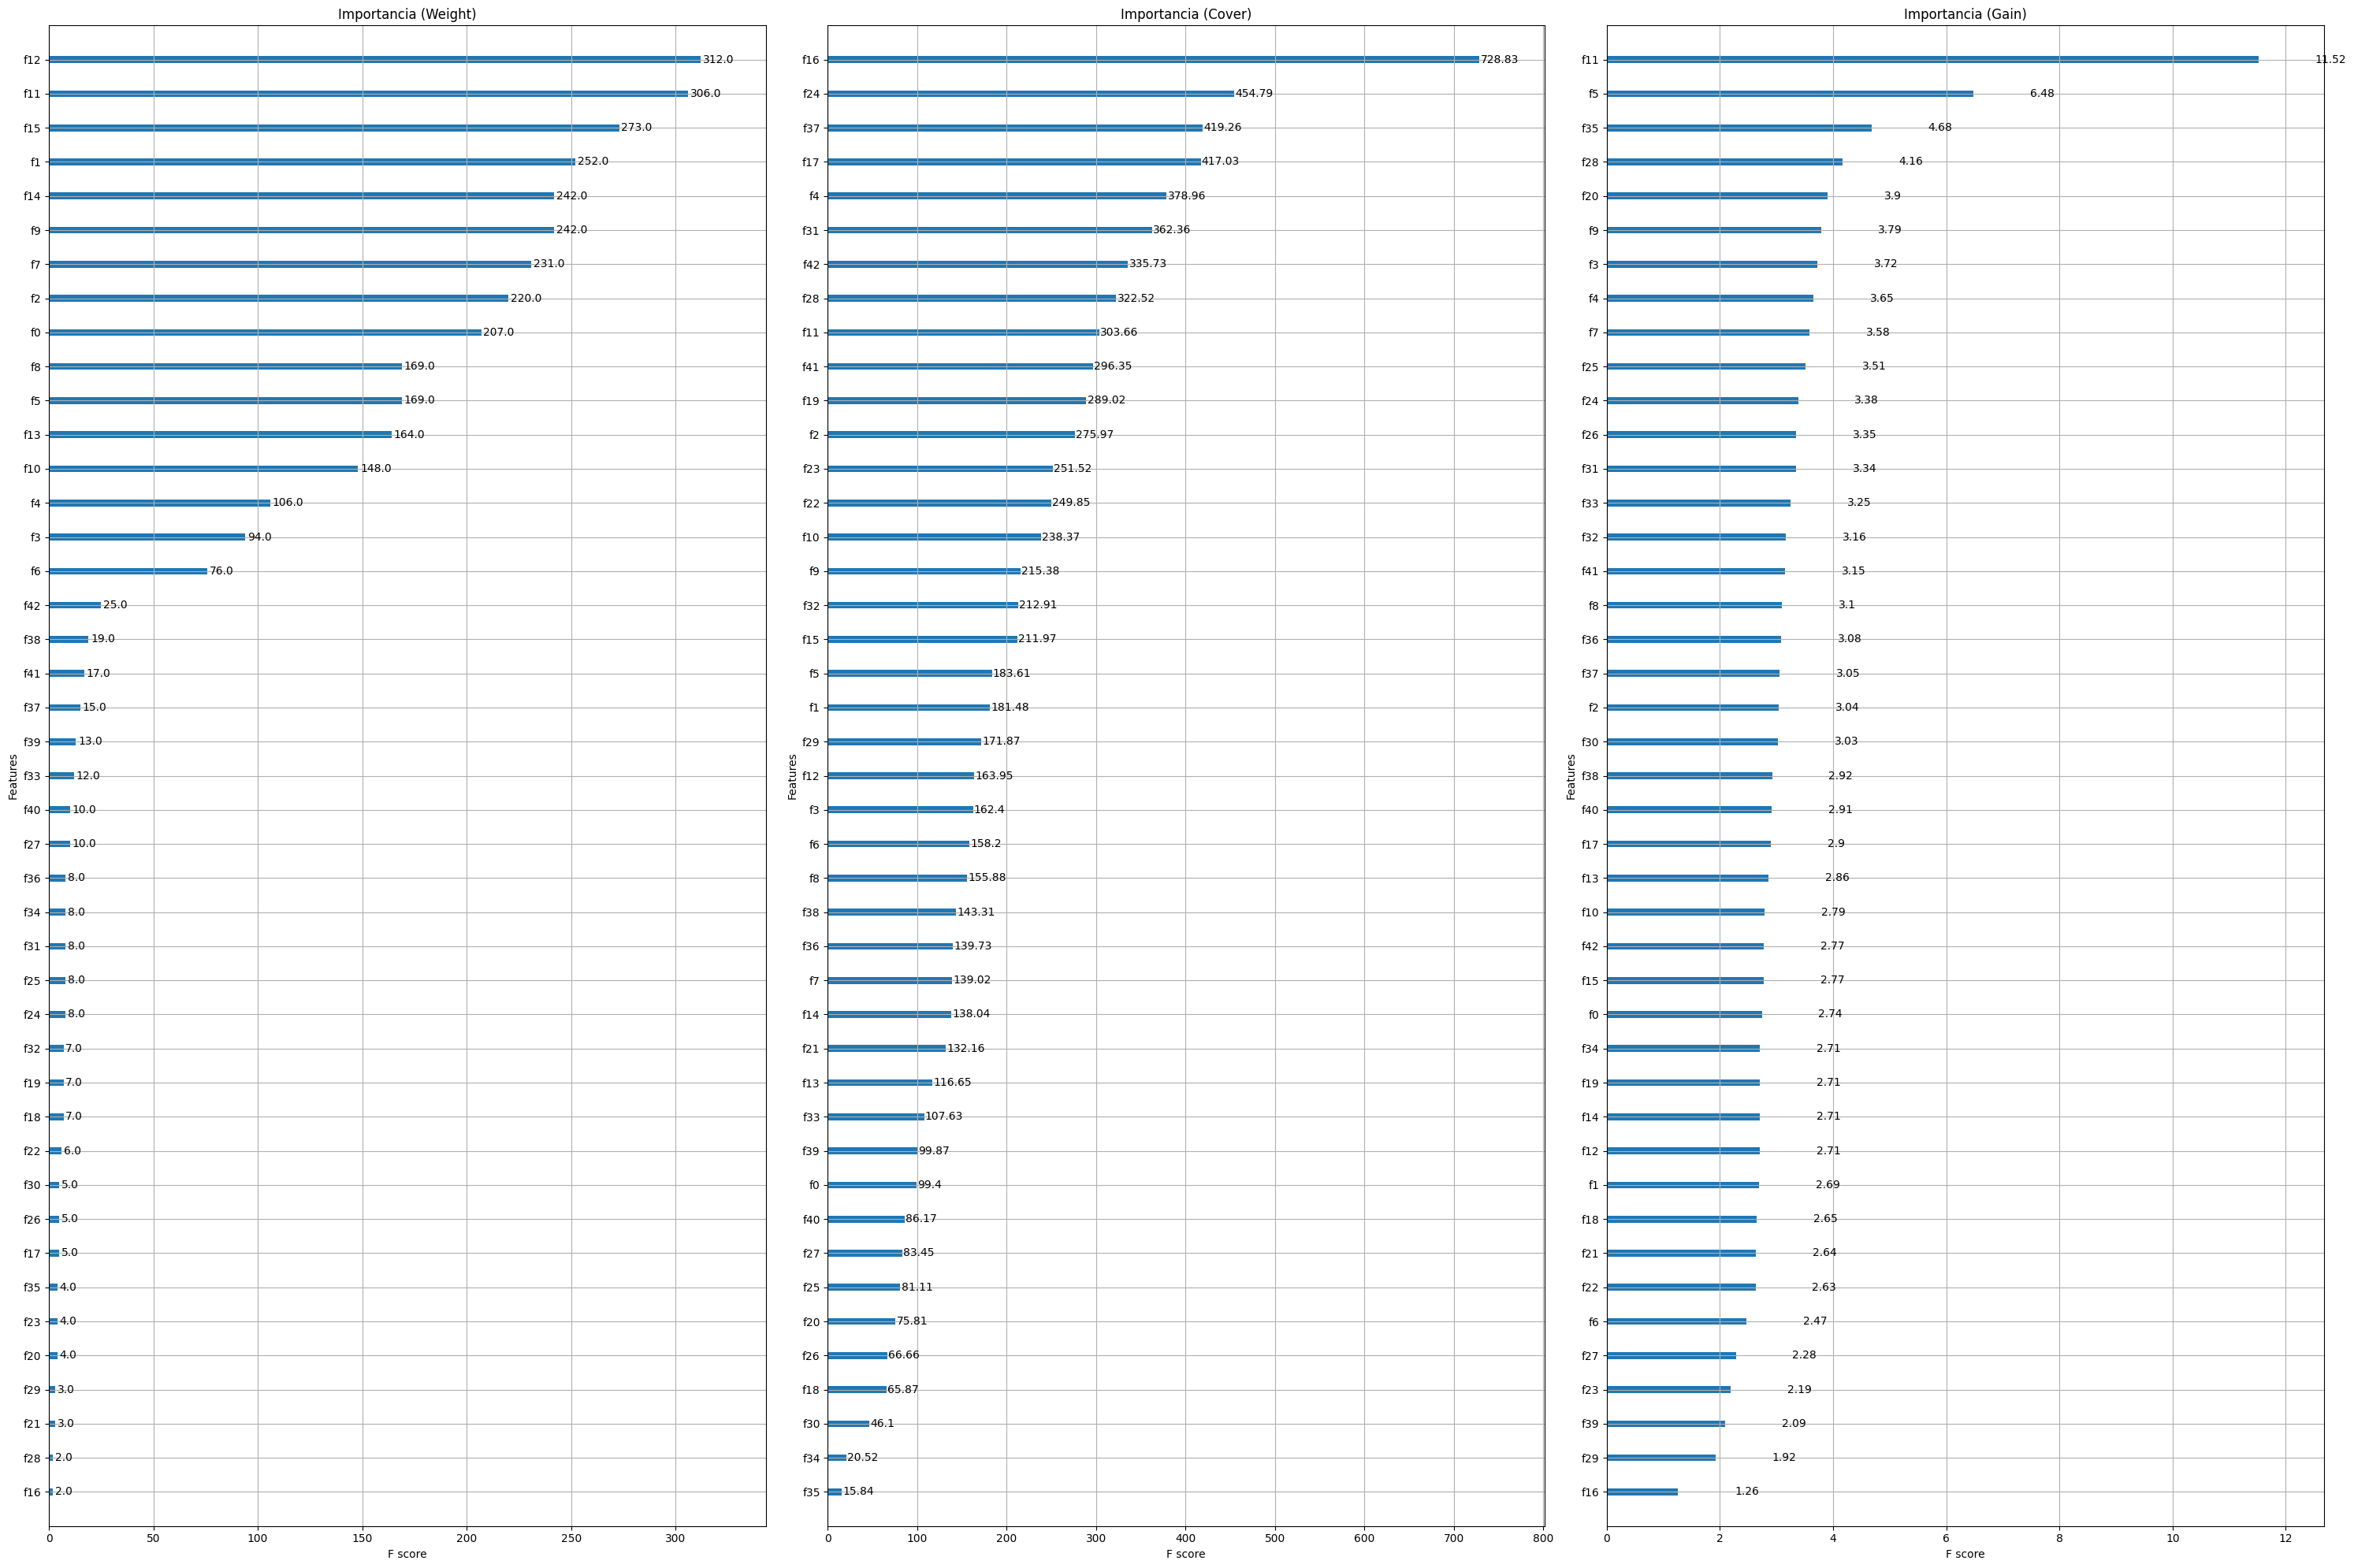

In [34]:
import numpy as np
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
import matplotlib.pyplot as plt
from xgboost import  plot_importance

# Obtener los nombres de las columnas
column_names = X_train.columns

# Obtener la importancia de las características
feature_importance_weight = clf.feature_importances_
feature_importance_cover = clf.get_booster().get_score(importance_type='cover')
feature_importance_gain = clf.get_booster().get_score(importance_type='gain')


# Redondear los valores de cover y gain
rounded_cover = {key: np.round(val, 2) for key, val in feature_importance_cover.items()}
rounded_gain = {key: np.round(val, 2) for key, val in feature_importance_gain.items()}

# Obtener los índices y valores de importancia ordenados por valor (weight)
sorted_indices = np.argsort(feature_importance_weight)[::-1]
sorted_importance_weight = feature_importance_weight[sorted_indices]

# Obtener los nombres de los 10 mejores términos y sus importancias correspondientes
top_10_indices = sorted_indices[:10]
top_terms_importance = sorted_importance_weight[:10]

# Crear una figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 20))

# Plot de la importancia basada en weight
plot_importance(clf, importance_type='weight', ax=axs[0])
axs[0].set_title('Importancia (Weight)')

# Plot de la importancia basada en cover
plot_importance(rounded_cover, ax=axs[1])
axs[1].set_title('Importancia (Cover)')

# Plot de la importancia basada en gain
plot_importance(rounded_gain, ax=axs[2])
axs[2].set_title('Importancia (Gain)')

# Ajustar los subplots para una mejor visualización
plt.tight_layout()
plt.show()

In [121]:
from sklearn.inspection import permutation_importance

res_pi = permutation_importance(pipeline, X_train, y_train, n_repeats= 30 , n_jobs= 2 ,
                                scoring= 'neg_mean_squared_error' , random_state= 42 )

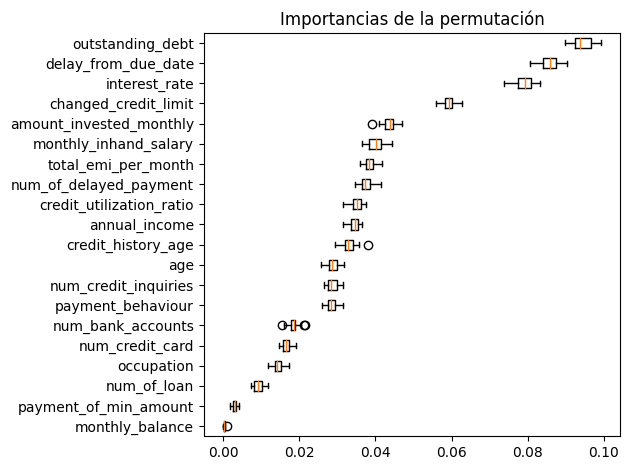

In [37]:
sorted_idx = res_pi.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    res_pi.importances[sorted_idx].T, vert= False , labels=X_train.columns[sorted_idx]
)
ax.set_title( "Importancias de la permutación" )
fig.tight_layout()
plt.show()

In [40]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.3 MB/s eta 0:00:00


SHAP values para el clasificador XGBoost (primer ejemplo del conjunto de prueba):
[ 0.2  -0.36  0.27 -0.02  0.09  0.89 -0.33  0.02 -0.04 -0.16  0.35  0.84
 -0.18  0.25 -0.68  0.1  -0.03 -0.01  0.    0.01 -0.    0.   -0.   -0.
  0.   -0.   -0.    0.01  0.04 -0.    0.   -0.    0.02 -0.    0.   -0.01
 -0.02  0.01  0.04  0.    0.01  0.02  0.34]



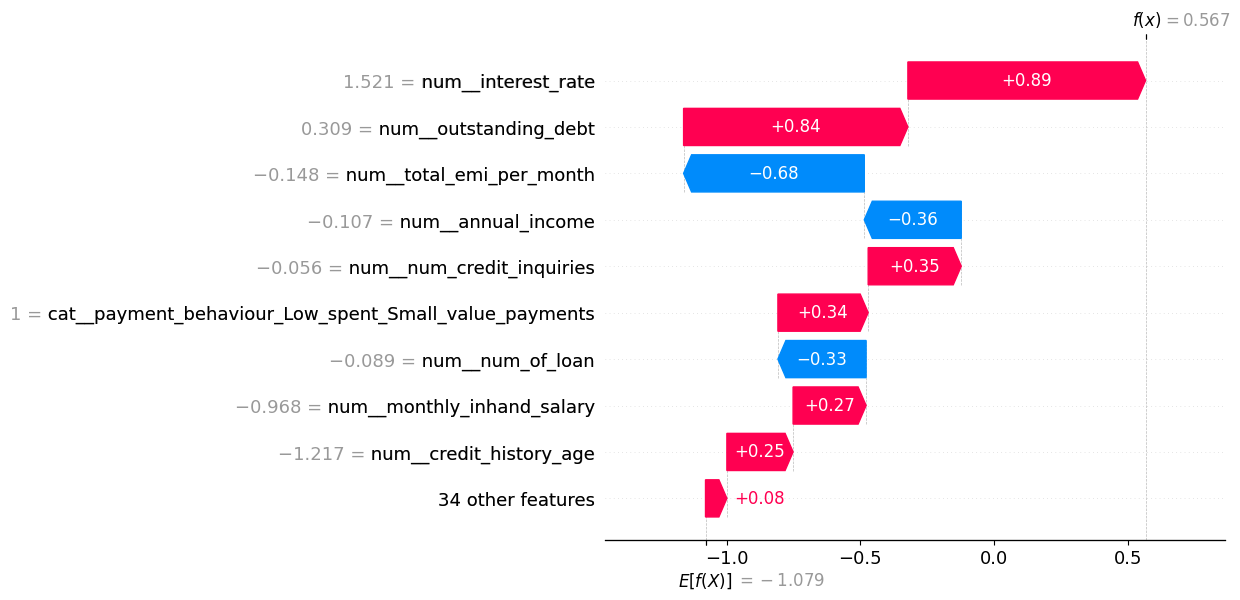


Importancia de las características para el clasificador XGBoost:
[0.01953042 0.01918451 0.02169733 0.0265487  0.02599694 0.04619999
 0.01763983 0.02551623 0.02210496 0.02703151 0.01988852 0.08215035
 0.01934841 0.02038658 0.0193401  0.01975925 0.00900616 0.02066033
 0.01887608 0.01930579 0.02783597 0.01879518 0.01875282 0.015589
 0.02411049 0.02505969 0.02387852 0.01627903 0.02964719 0.01370863
 0.02159448 0.02384177 0.02252804 0.02317519 0.01928926 0.0333562
 0.02195441 0.02174667 0.02078744 0.01492527 0.0207243  0.02246697
 0.01978152]



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


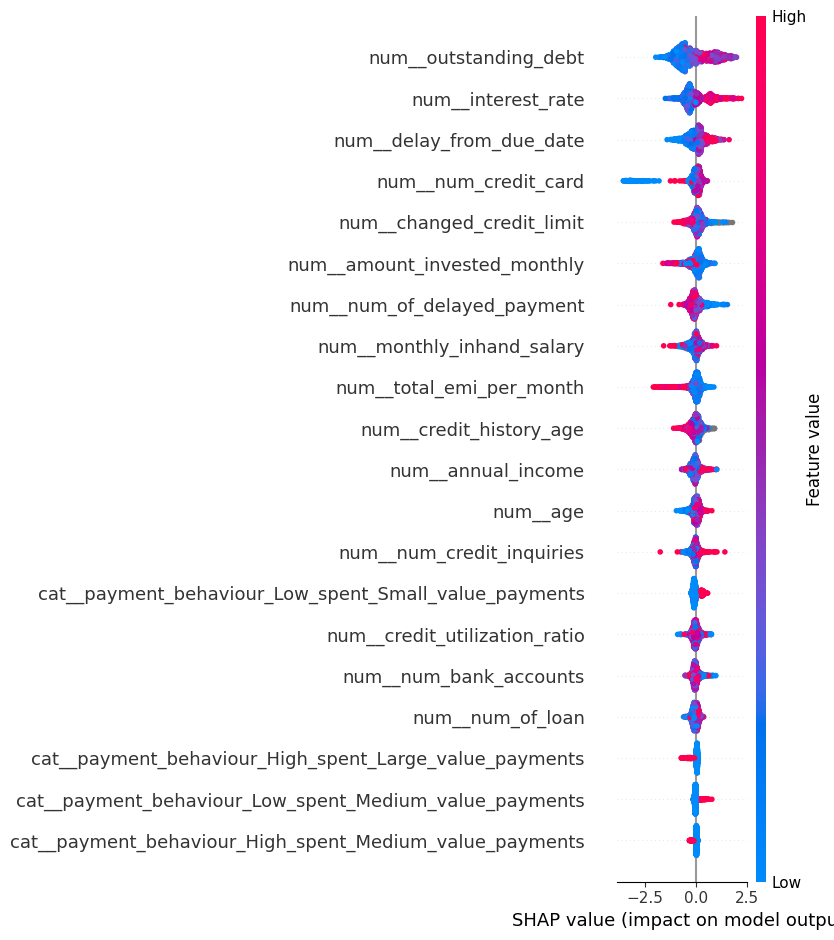

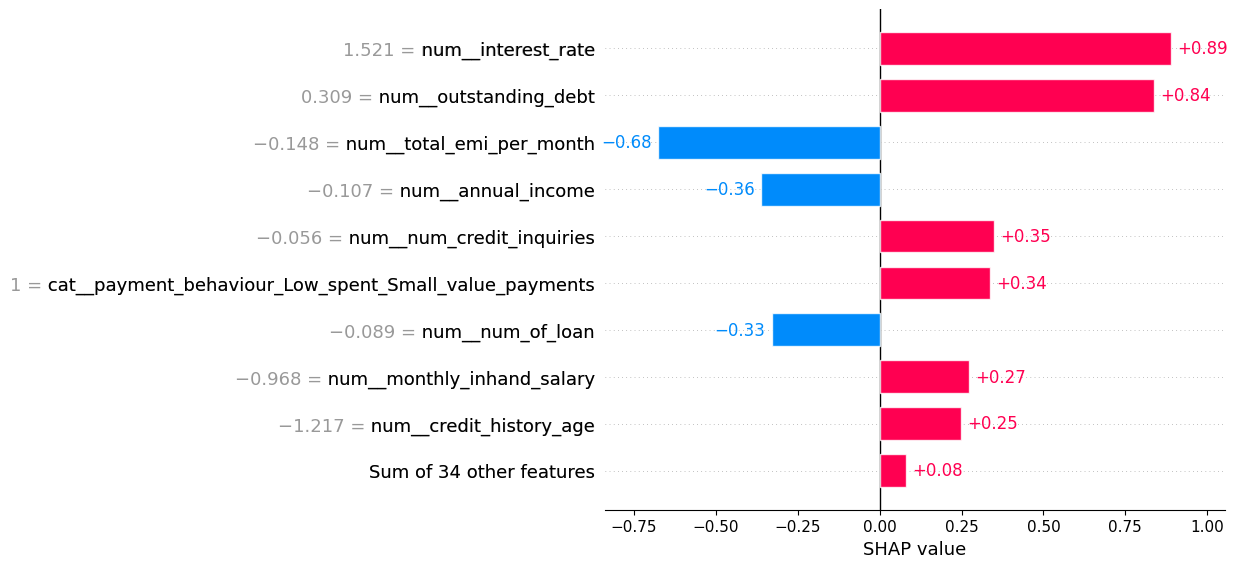

In [119]:
import shap
shap.initjs()

# Assuming 'pipeline' contains your trained scikit-learn classifier and preprocessor
model = pipeline.named_steps['classifier']

# If the model is a tree-based model, use TreeExplainer
explainer = shap.TreeExplainer(model)

X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

print(f"SHAP values para el clasificador {clf_name} (primer ejemplo del conjunto de prueba):")
round_values = np.round(shap_values[0], 2)
print(round_values)
columnas_zero = []
for i in range(len(shap_values[0])):
  if round_values[i] == 0:
    columnas_zero.append(X_test_transformed.columns[i])
print()

# Create an Explanation object from the SHAP values
explanation = shap.Explanation(values=shap_values[0],
                               base_values=explainer.expected_value,
                               data=X_test_transformed.iloc[0],
                               feature_names=X_test_transformed.columns)

# Visualize the waterfall plot for the first example in the test set
shap.plots.waterfall(explanation)
print()

# Get feature importances from the underlying tree-based model
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
else:
    feature_importances = None


print(f"Importancia de las características para el clasificador {clf_name}:")
print(feature_importances)
print()

# Visualize the feature importances using SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test_transformed.columns)
print()

# Visualize the feature importances for the first example using a bar plot
if feature_importances is not None:
    shap.plots.bar(explanation)
print()

La igualdad o desigualdad en los resultados se debe a las características inherentes de cada método de evaluación de importancia. Por ejemplo, el método basado en "weight" puede dar más peso a las características utilizadas en los niveles superiores del árbol, mientras que el método basado en "gain" puede resaltar las características que generan una mayor reducción de la impureza en cada división. Por lo tanto, las diferencias en los resultados se deben a las diferentes perspectivas desde las cuales se evalúa la importancia de las características. Es por esto que la importancia de las variables no son equitativas, ya que existen variables que son mucho más condicionantes para predecir si pagará su credito bancario. De las variables más importantes, se puede entrever coherencia ya que se fijan principalmente en la cantidad de deuda, la fecha en la que se pagó y el interés del credito.

UTilizando el modelo de permutación, se puede ver como interactuan las variables entre ellas, ya que el método procura reordenar aleatoriamente los valores de la variable y ver el impacto que causará en la predicción. Entre más cercano al 0 menor es el efecto que tiene la variable, donde es este caso se tiene que el "monthly balance" es la variable más irrelevante.

Cuando se utiliza un interpretabilidad a nivel local con los datos transformados, se puede ver que ahora otras variables son las que se interpretan como irrelevantes como los son las ocupaciones.  

## Conclusiones

**¿Pudieron resolver exitosamente el problema?¿Son aceptables los resultados obtenidos?**

Se puede decir a través de las métricas de evaluación que el problema fue aceptablemente resuelto, ya que la métrica de f1-score se obtuvo alrededor de un 60%. Un punto de comparación a tomar en consideración, es el modelo "Dummy", ya que este modelo busca predecir de manera aleatoria los resultados, por lo que si un modelo está por debajo de estos valores, se dice que no resuelve el problema y de manera análoga cuando supera considerablemente al modelo dummy, se puede interpretar que la clasificación se está realizando correctamente.

**¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?**

El análisis exploratorio ayudó a entender la distribución de las variables, ya que dependiendo de esta, que tipo de transformación es necesaria. Además Los modleos predictivos exigen que los datos no tengan valores nulos, por lo que es necesario verificar valores nulos. Entendiendo la distribución de las variables y verificando que la estructura de los datos sea correcta, i.e formato, valores nulos, etc, permiten al modelo clasificar de mejor manera en un menor tiempo.

**¿Como fue el rendimiento del baseline para la clasificación?**

F1 Score para cada Clasificador en el base line:

|       | Classifier | F1 Score|
|:-:|:------------:|:----------:|          
|6|LightGBM|0.606383|
|5|Random Forest | 0.593205 |
|7|              XGBoost | 0.581045|
|4|                  SVM | 0.532443|
|2|  K-Nearest Neighbors | 0.521898|
|1|  Logistic Regression | 0.498994|
|3|        Decision Tree | 0.482157|
|0|   Dummy (Stratified) | 0.315617|

Se puede ver que los modelos basados en metodos de árboles son los que mejor rendimiento tuvieron con los datos. Se tiene resultados aceptables, ya que como se mencionó anteriormente superan las métricas del dummy. Además para la métrica f1-score entre más cercano el valor a 1 mejor.



**¿Pudieron optimizar el baseline para la clasificación?¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?**

Con la grilla utilizada para la optimización de hiperparámetros, no se encontró una mayor mejora en las métricas de evaluación. Esto se puede interpretar como que los hiperparámetros por defecto del modelo LightGBM se ajustaban correctamente a los datos entregados.

Se intentó balancear los datos con diferentes métodos de data augmentation, pero no se encontraron mejores optimizaciones, si no por el contrario, el método empeoró sus resultados. Esto se puede interpretar de varias formas, como por ejemplo que el select k-best utilizado, al no tomar en consideración el modelo, puede entregar datos que no son relevantes para este y que no sean beneficiosos para el proceso de clasificación.

**¿Estuvieron conformes con sus resultados?¿Creen que hayan mejores formas de modelar el problema?**

Estamos conformes con los resultados, ya que se logró predecir de buena manera que clientes puede que no cumplan con los pagos acordados. Si bien existen más formas de abordar el problema y de forma más rigurosa, como lo puede ser probar diferentes modelos un análisis de correlación previo al entrenamiento de los datos, tener a un experto bancario para que verifique la importancia de cada variable y que se prueben más hiperparámetros en la grilla, debido al tiempo que se le podía deidcar al proyecto, se lograron muy buenos resultados.

**¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?**

A lo largo del proyecto, estudiamos nuevos modelos de clasificación que anteriormente no habiamos probado, como lo es LightGBM. Se estudio la estructura de cada modelo y de esta forma entender de mejor manera como clasificaba el modelo en lugar de entenderlo como una caja negra. En esta ocasión también se implementó al pipeline data augmentation, y de esta manera balancear las clases, algo que en los laboratorios anteriores no se había realizado.

Uno de los integrantes del grupo mencionó que a lo largo del curso, no se trabajó con series de tiempo y que en su práctica profesional tuvo que aprender a modelarlas y a trabajar con clasificadores. Mencionó que le hubiese gustado que se enseñaran en el curso, ya que le costó en entenderlas y que no existen muchos cursos donde se estudie en profundidad.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>